In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import to_rgba

from core.io_functions import load_data
from core.core_functions import cut_region, mask_domain, get_representative_member, aggregate_area

dpi = 300
mpl.rc('font', **{'size': 8})
cm = 1/2.54  # centimeters in inches

fig_path = '../figures'

ERROR 1: PROJ: proj_create_from_database: Open of /home/b/b381815/.conda/envs/lb_python/share/proj failed


In [2]:
indices = {}
for index in ['wsdi', 'txx', 'su', 'tx90p']:
    indices[index] = mask_domain(load_data(index))

for index in ['rx1day', 'r95p', 'r10mm', 'cwd', 'cdd', 'prcptot']:
    indices[index] = mask_domain(load_data(index))

## Figure 1

In [3]:
index = 'tx90p'

da = indices[index]
da = cut_region(da, lon_bounds=[-12, 60], lat_bounds=[35, 70])
member_median = get_representative_member(da, select_by='median')['member'].item()
member_min = get_representative_member(da, select_by='min')['member'].item()
member_max = get_representative_member(da, select_by='max')['member'].item()

print(f'{member_median=}')
print(f'{member_min=}')
print(f'{member_max=}')

member_median='r15i1p1f1'
member_min='r27i1p1f1'
member_max='r31i1p1f1'


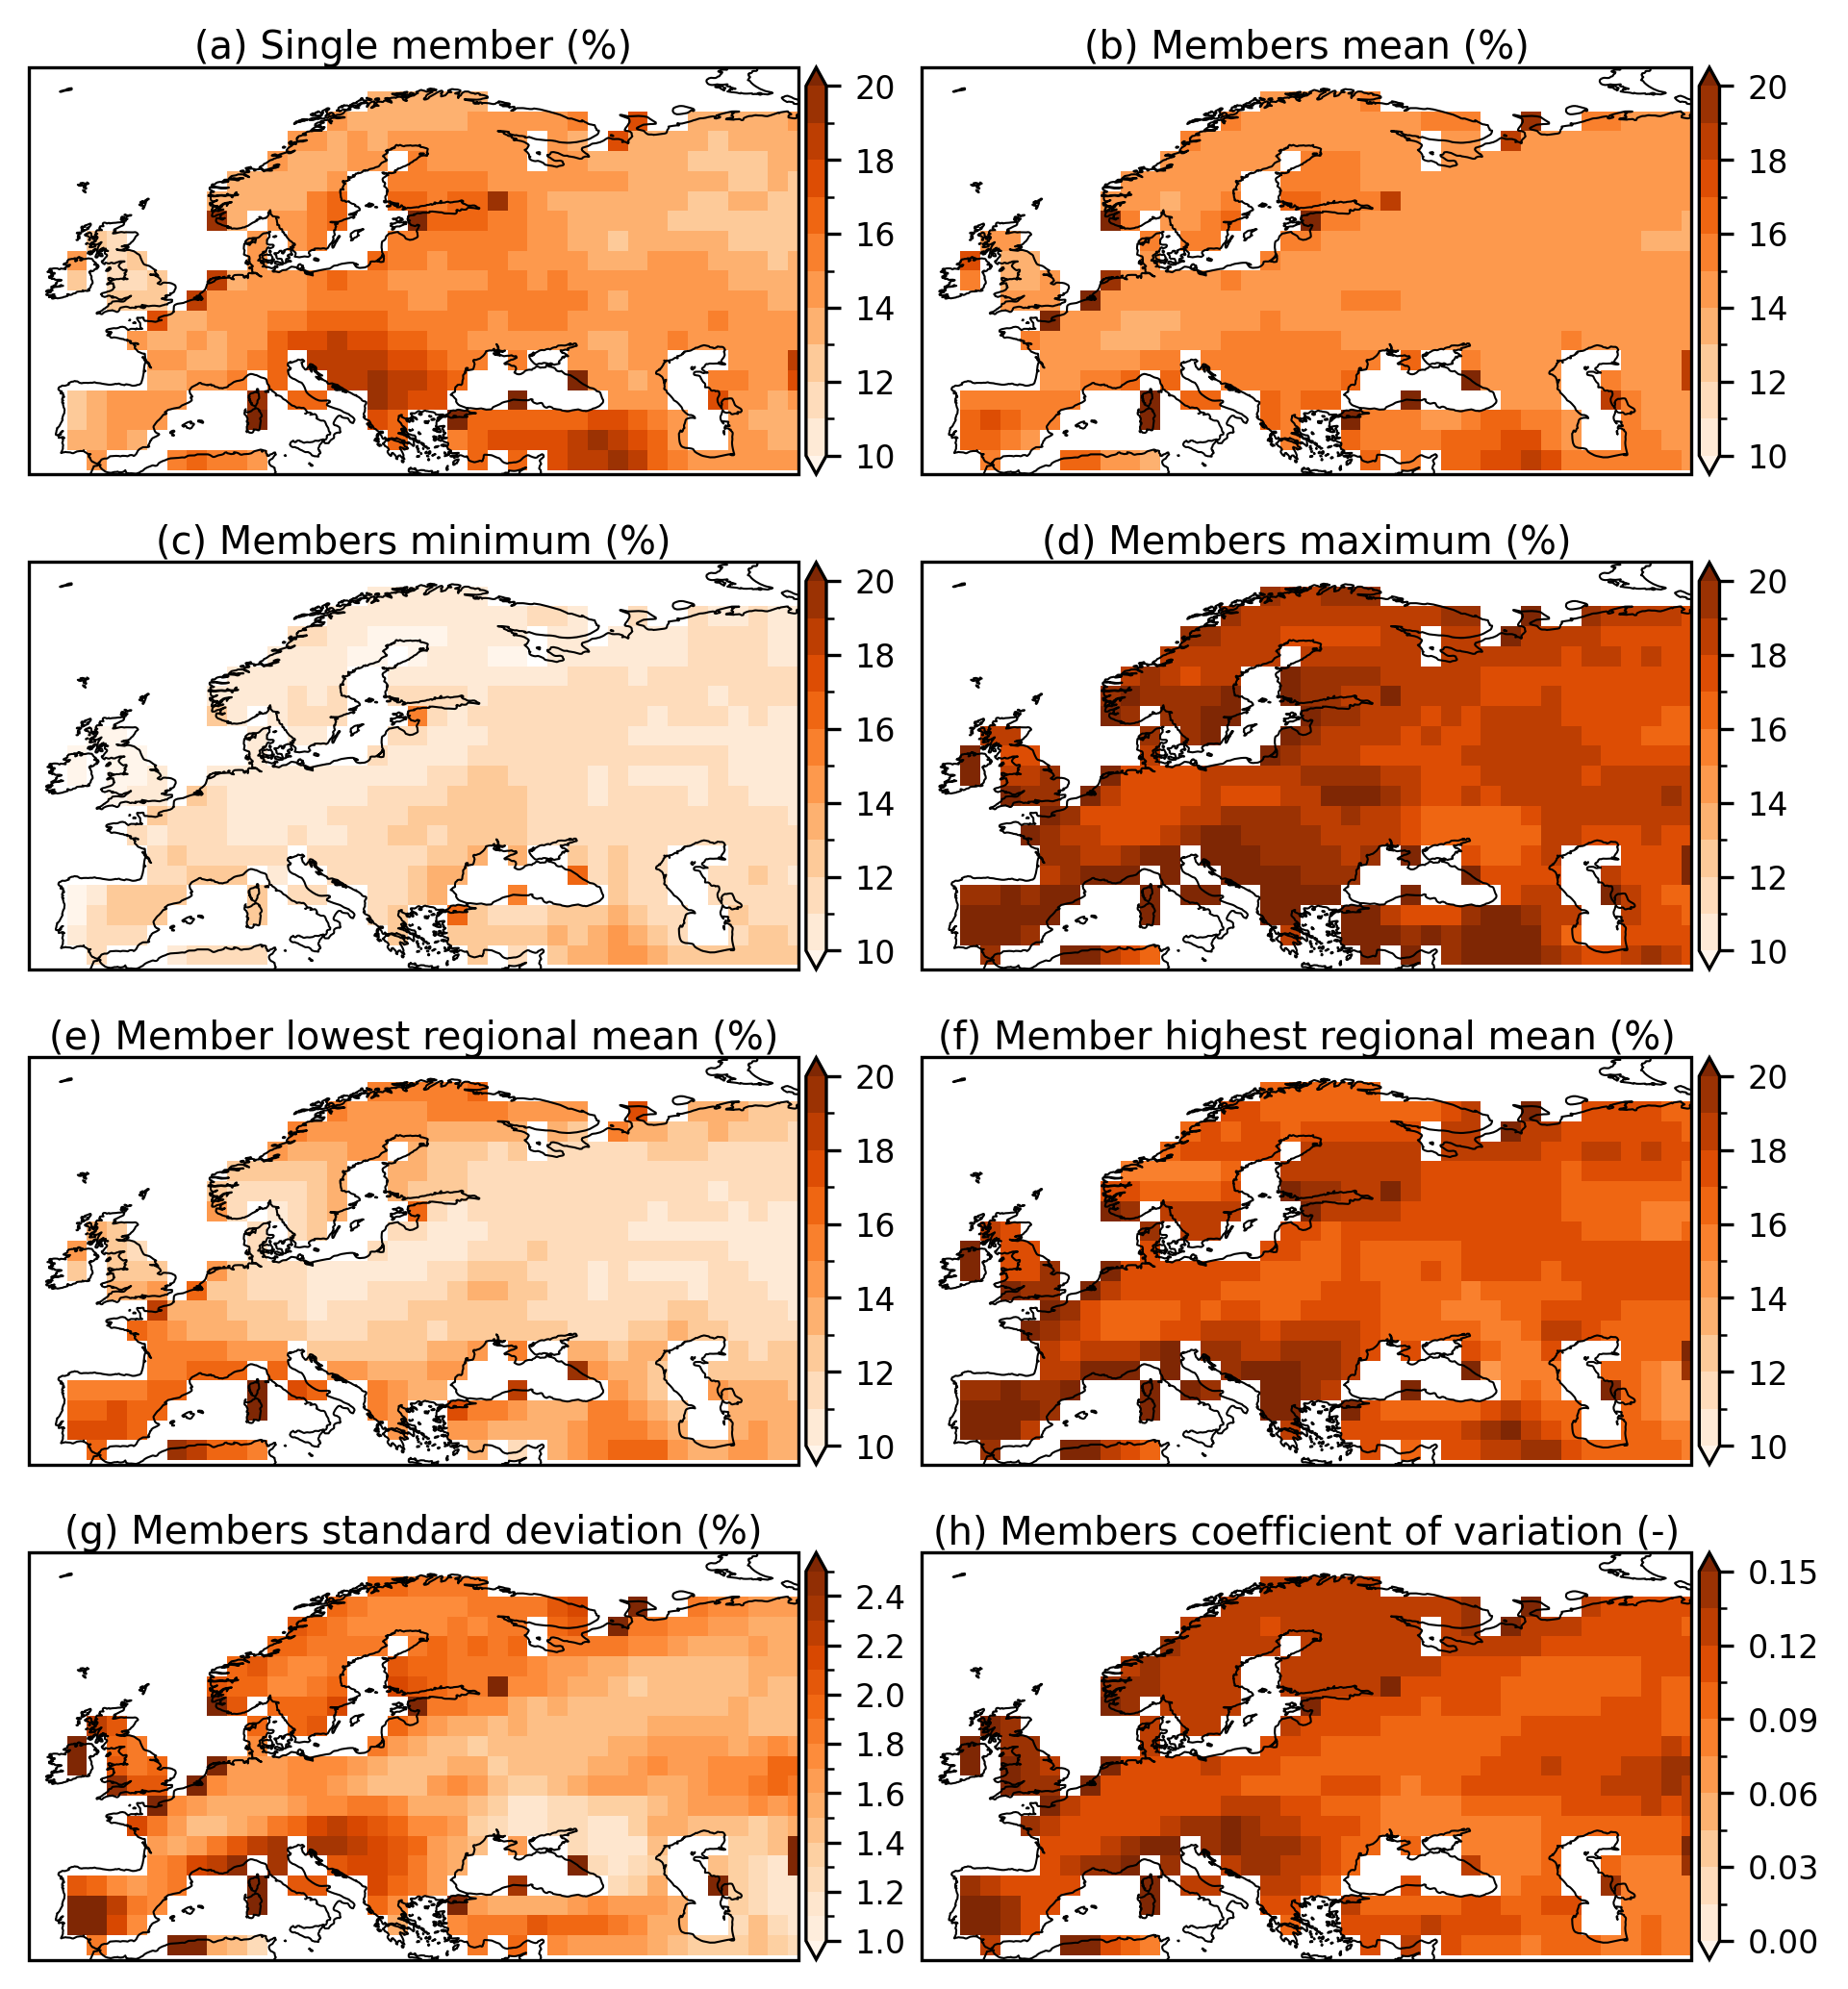

In [4]:
kwargs_figure1 = dict(
    cmap='Oranges',
    levels=np.arange(10, 20.1, 1),
    extend='both',
    cbar_kwargs={'label': '', 'fraction': .0255, 'pad': .01}
)

fig, axes = plt.subplot_mosaic(
    """
    ab
    cd
    ef
    gh
    """,
    figsize=(16*cm, 17.5*cm),
    dpi=dpi,
    per_subplot_kw={
        ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'): {'projection': ccrs.PlateCarree()},
    },
    gridspec_kw={'wspace': .12, 'hspace': .17, 'left': .01, 'right': .94, 'bottom': .01, 'top': .97},
    
)

for ax in axes.values():
    ax.set_extent([-12, 60, 35, 70])
    ax.coastlines(lw=.5)

subplot = 'a'
da.sel(member=member_median).plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Single member ({da.attrs["units"]})', pad=.1)

subplot = 'b'
da.mean('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Members mean ({da.attrs["units"]})', pad=.1)

subplot = 'c'
da.min('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Members minimum ({da.attrs["units"]})', pad=.1)

subplot = 'd'
da.max('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Members maximum ({da.attrs["units"]})', pad=.1)

subplot = 'e'
da.sel(member=member_min).plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Member lowest regional mean ({da.attrs["units"]})', pad=.1)

subplot = 'f'
da.sel(member=member_max).plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Member highest regional mean ({da.attrs["units"]})', pad=.1)

subplot = 'g'
kwargs_figure1.update(dict(levels=np.arange(1, 2.51, .1)))  # update colorbar range 
da.std('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Members standard deviation ({da.attrs["units"]})', pad=.1)

subplot = 'h'
kwargs_figure1.update(dict(levels=np.arange(0, .151, .015)))  # update colorbar range 
(da.std('member') / da.mean('member')).plot.pcolormesh(ax=axes[subplot], **kwargs_figure1)
axes[subplot].set_title(f'({subplot}) Members coefficient of variation (-)', pad=.1)

# plt.savefig(os.path.join(fig_path, 'tx90p_example.png'), dpi=dpi)
plt.savefig(os.path.join(fig_path, 'tx90p_example.pdf'), dpi=dpi)

## Figure 2

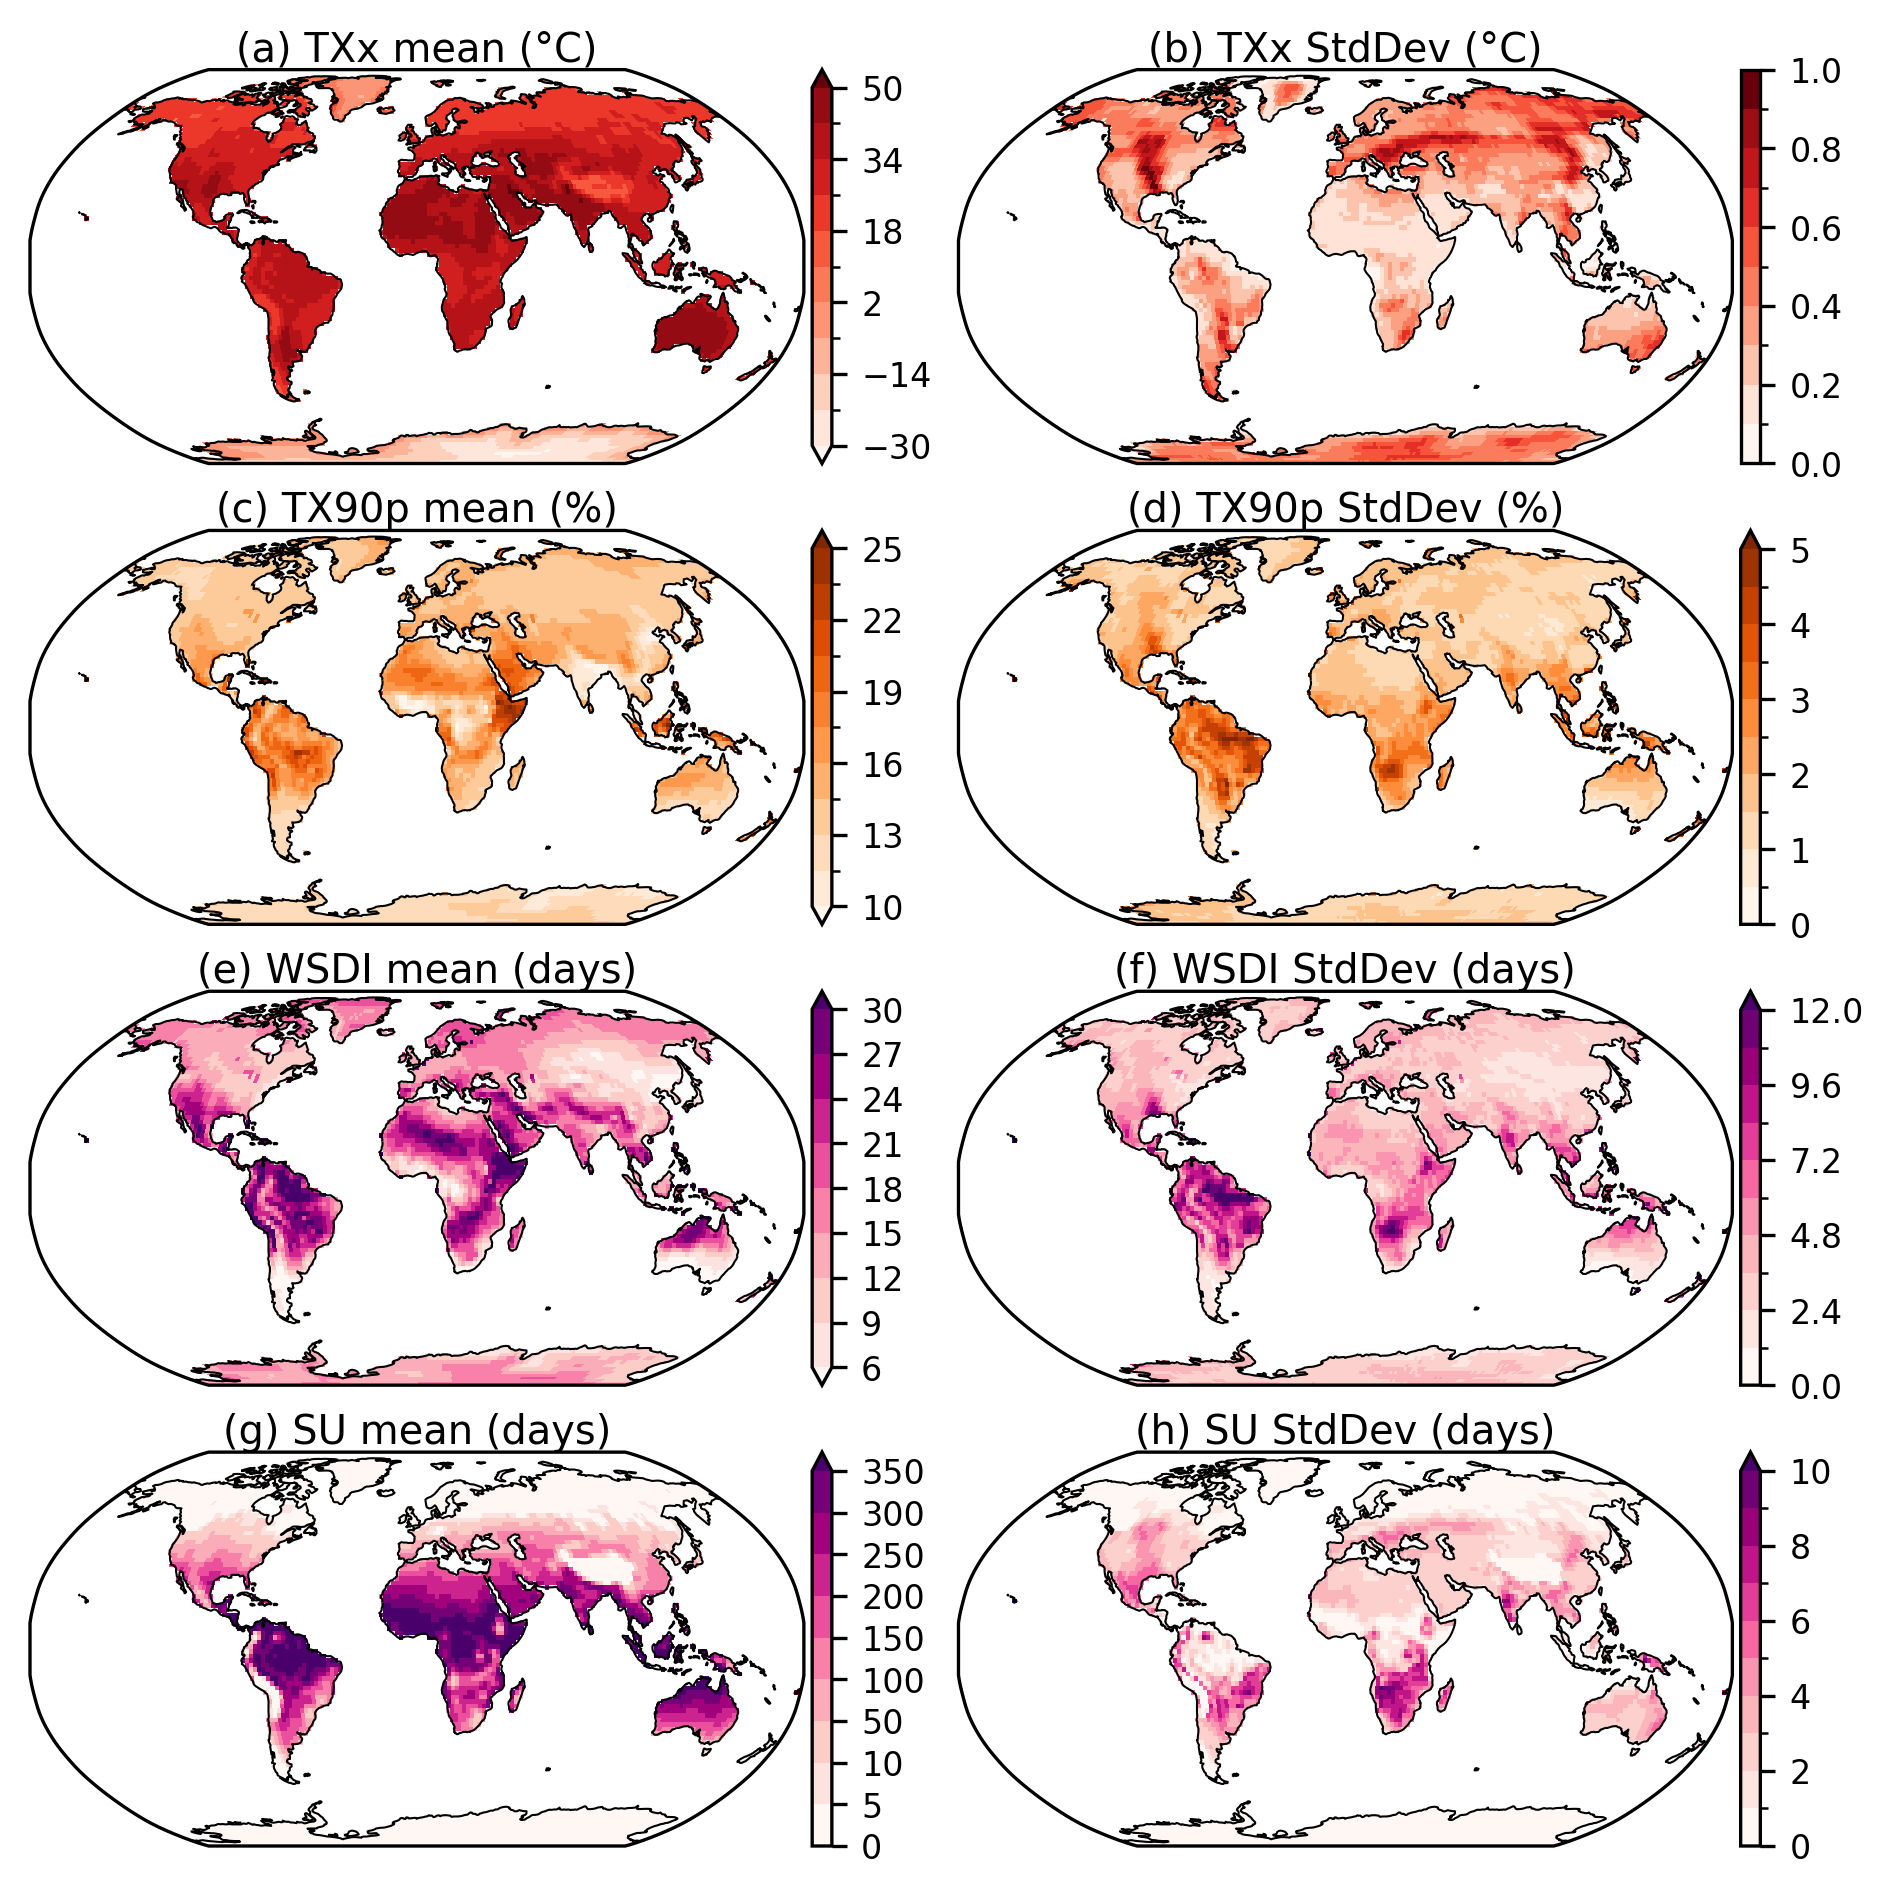

In [5]:
kwargs_figure2 = dict(
    transform = ccrs.PlateCarree(),
    cbar_kwargs = {'label': '', 'fraction': .025, 'pad': .01},
)

fig, axes = plt.subplot_mosaic(
    """
    ab
    cd
    ef
    gh
    """,
    figsize=(16*cm, 16*cm),
    dpi=dpi,
    per_subplot_kw={
        ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'): {'projection': ccrs.Robinson()},
    },
    gridspec_kw={'wspace': .12, 'hspace': .17, 'left': .0, 'right': .93, 'bottom': .02, 'top': .96},
    
)

for ax in axes.values():
    ax.coastlines(lw=.5)

index = 'txx'  # =============================================================
subplot = 'a'
kwargs_figure2.update(dict(levels=np.arange(-30, 50.1, 8), cmap='Reds'))
indices[index].mean('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure2)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} mean ({indices[index].attrs["units"]})', pad=.1)

subplot = 'b'
kwargs_figure2.update(dict(levels=np.arange(0, 1.1, .1)))
indices[index].std('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure2)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} StdDev ({indices[index].attrs["units"]})', pad=.1)

index = 'tx90p'  # ===========================================================
subplot = 'c'
kwargs_figure2.update(dict(levels=np.arange(10, 25.1, 1.5), cmap='Oranges'))
indices[index].mean('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure2)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} mean ({indices[index].attrs["units"]})', pad=.1)

subplot = 'd'
kwargs_figure2.update(dict(levels=np.arange(0, 5.1, .5)))
indices[index].std('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure2)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} StdDev ({indices[index].attrs["units"]})', pad=.1)

index = 'wsdi'  # ============================================================
subplot = 'e'
kwargs_figure2.update(dict(levels=np.arange(6, 30.1, 3), cmap='RdPu'))
indices[index].mean('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure2)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} mean ({indices[index].attrs["units"]})', pad=.1)

subplot = 'f'
kwargs_figure2.update(dict(levels=np.arange(0, 12.1, 1.2)))
indices[index].std('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure2)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} StdDev ({indices[index].attrs["units"]})', pad=.1)

index = 'su'  # ==============================================================
subplot = 'g'
kwargs_figure2.update(dict(levels=[0, 5, 10, 50, 100, 150, 200, 250, 300, 350]))
indices[index].mean('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure2)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} mean ({indices[index].attrs["units"]})', pad=.1)

subplot = 'h'
kwargs_figure2.update(dict(levels=np.arange(0, 10.1, 1)))
indices[index].std('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure2)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} StdDev ({indices[index].attrs["units"]})', pad=.1)

plt.savefig(os.path.join(fig_path, 'temperature_indices.png'), dpi=dpi)
plt.savefig(os.path.join(fig_path, 'temperature_indices.pdf'), dpi=dpi)

## Figure 3

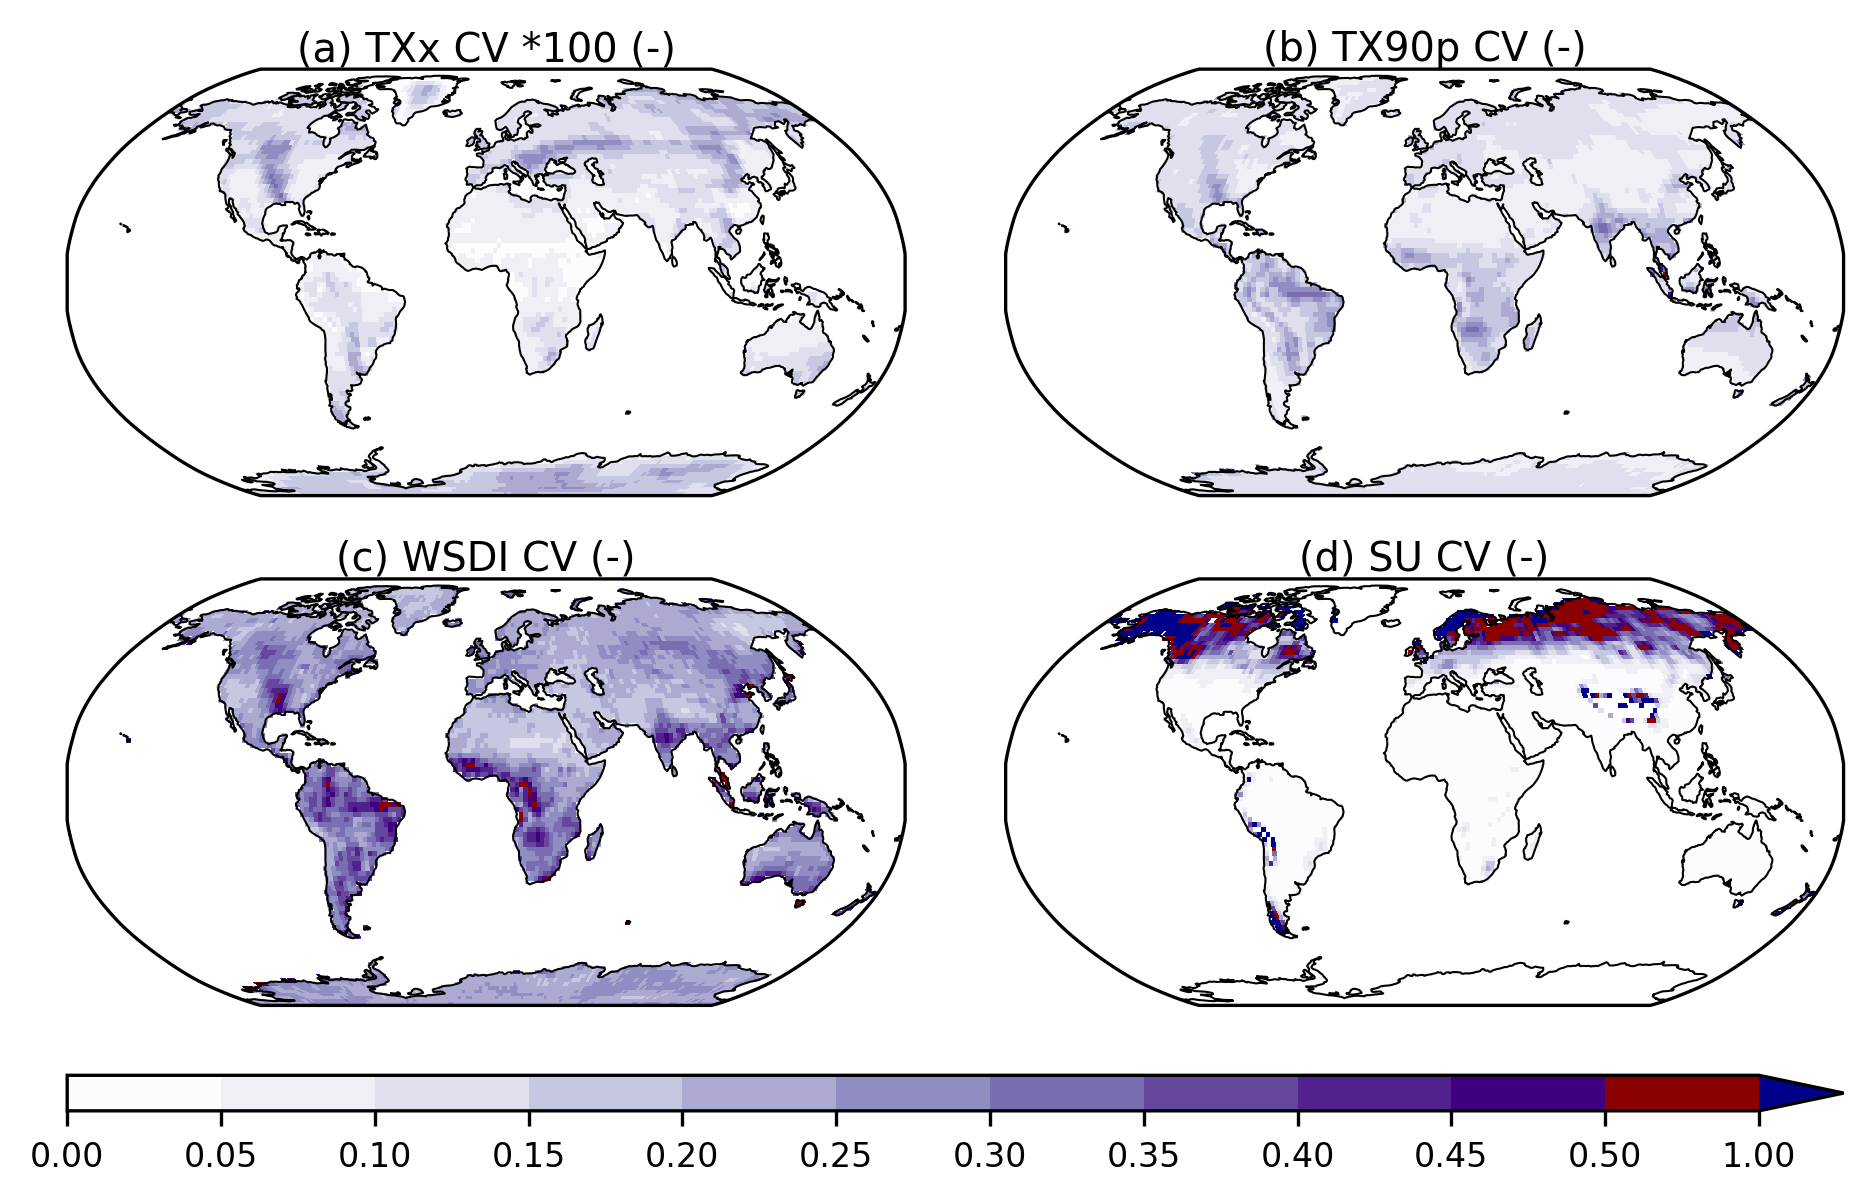

In [6]:
levels_cv = np.arange(0, .51, .05)
levels_cv = np.concatenate([levels_cv, [1]])
cmap_cv = mpl.colormaps['Purples']
colors = cmap_cv(np.linspace(0, 1, len(levels_cv)-2))
colors = np.concatenate([colors, [to_rgba('darkred')]])
cmap_cv = mpl.colors.ListedColormap(colors)
cmap_cv.set_over(to_rgba('darkblue'))
# cmap_cv.set_under('orange')

kwargs_figure3 = dict(
    transform = ccrs.PlateCarree(),
    levels = levels_cv,
    cmap = cmap_cv,
    add_colorbar=False,
)

fig, axes = plt.subplot_mosaic(
    """
    ab
    cd
    hh
    """,
    figsize=(16*cm, 10*cm),
    dpi=dpi,
    per_subplot_kw={
        ('a', 'b', 'c', 'd'): {'projection': ccrs.Robinson()},
    },
    height_ratios=[1, 1, .2],
    gridspec_kw={'wspace': .12, 'hspace': .17, 'left': .03, 'right': .97, 'bottom': .02, 'top': .96},
    
)

for subplot in ['a', 'b', 'c', 'd']:
    axes[subplot].coastlines(lw=.5)

subplot = 'a'
index = 'txx'
da = indices[index] + 273.15  # NOTE: need to convert degC to K otherwise CV can be negative which does not make sense
((da.std('member') / da.mean('member')) * 100).plot.pcolormesh(ax=axes[subplot], **kwargs_figure3)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} CV *100 (-)', pad=.1)

subplot = 'b'
index = 'tx90p'
(indices[index].std('member') / indices[index].mean('member')).plot.pcolormesh(ax=axes[subplot], **kwargs_figure3)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} CV (-)', pad=.1)

subplot = 'c'
index = 'wsdi'
(indices[index].std('member') / indices[index].mean('member')).plot.pcolormesh(ax=axes[subplot], **kwargs_figure3)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} CV (-)', pad=.1)

subplot = 'd'
index = 'su'
map_ = (indices[index].std('member') / indices[index].mean('member')).plot.pcolormesh(ax=axes[subplot], **kwargs_figure3)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} CV (-)', pad=.1)

ax = axes['h']
ax.axis("off")
cbar = plt.colorbar(
    map_, ax=ax, shrink=1, fraction=1, aspect=50,
    ticks=levels_cv, 
    label='', orientation='horizontal')


plt.savefig(os.path.join(fig_path, 'temperature_cv.png'), dpi=dpi)
plt.savefig(os.path.join(fig_path, 'temperature_cv.pdf'), dpi=dpi)

In [7]:
# def aggregate_area(da, method='mean'):
#     if not 'lat' in da.coords:
#         return da
#     if method == 'mean':
#         return da.weighted(np.cos(np.deg2rad(da['lat']))).mean(('lat', 'lon'), keep_attrs=True)
#     elif isinstance(method, (int, float)):
#         return da.weighted(np.cos(np.deg2rad(da['lat']))).std(('lat', 'lon'), keep_attrs=True)
    

In [8]:
# index = 'wsdi'
# aggregate_area(indices[index].std('member') / indices[index].mean('member'), .9).item()

## Figure 4

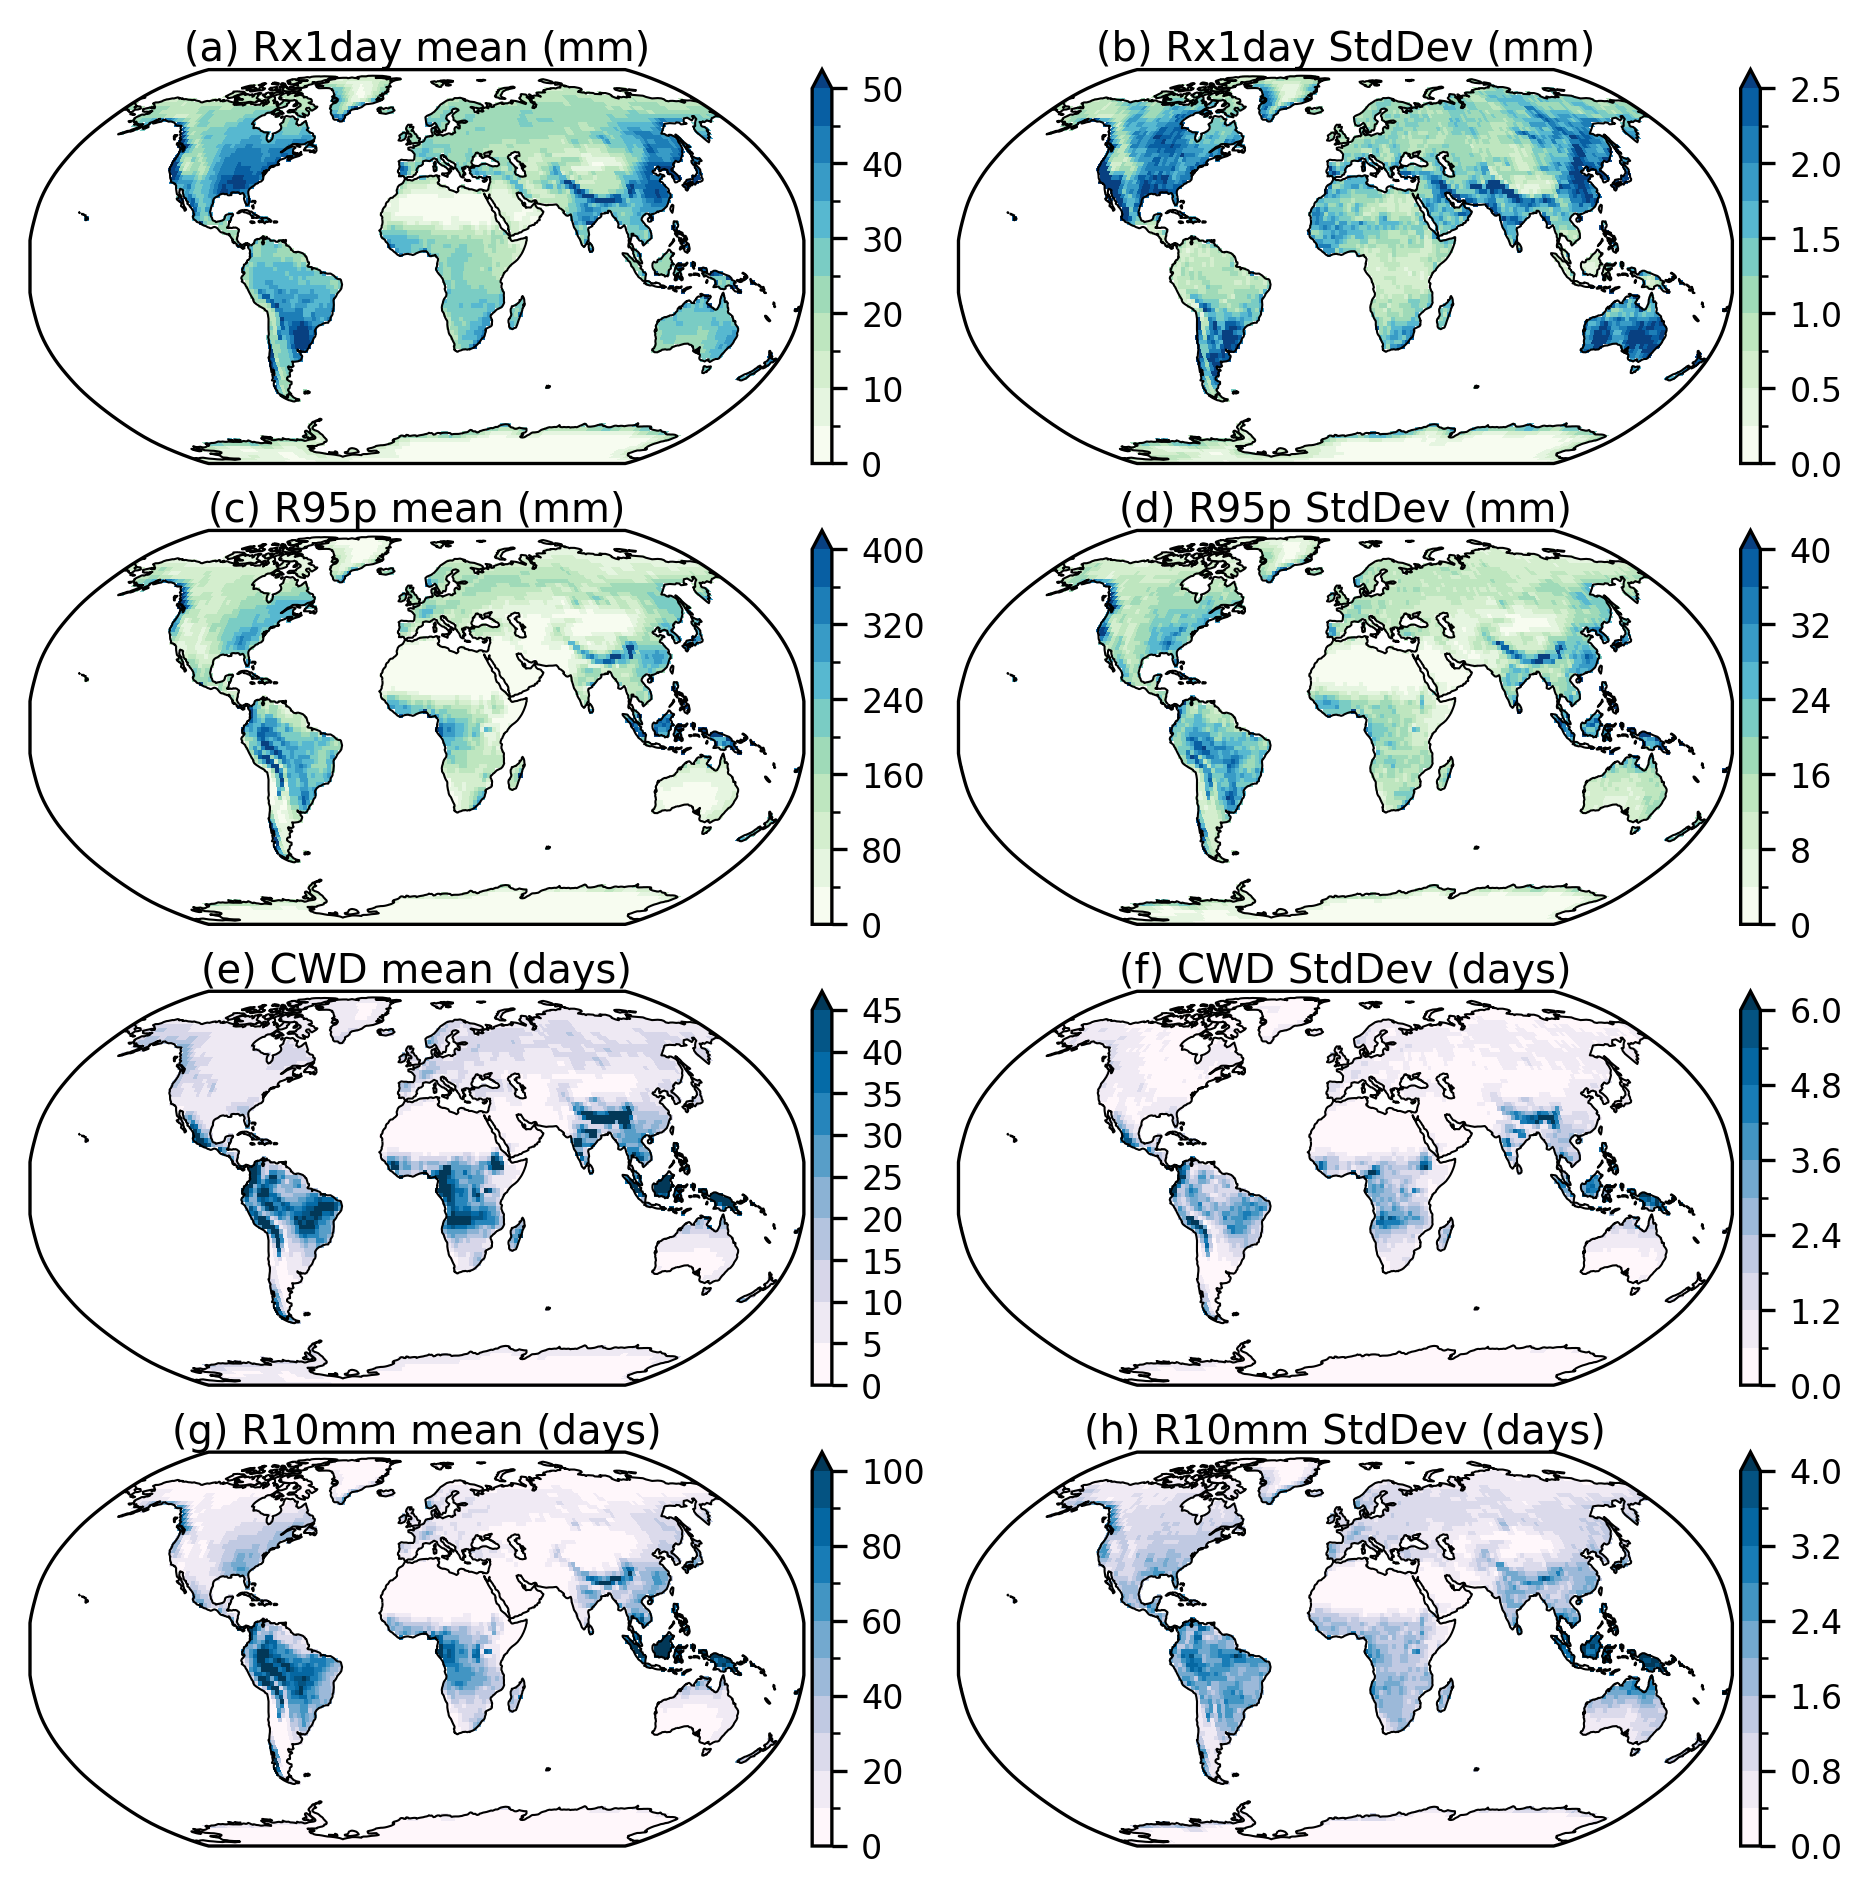

In [9]:
kwargs_figure4 = dict(
    transform = ccrs.PlateCarree(),
    cbar_kwargs = {'label': '', 'fraction': .025, 'pad': .01},
)

fig, axes = plt.subplot_mosaic(
    """
    ab
    cd
    ef
    gh
    """,
    figsize=(16*cm, 16*cm),
    dpi=dpi,
    per_subplot_kw={
        ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'): {'projection': ccrs.Robinson()},
    },
    gridspec_kw={'wspace': .12, 'hspace': .17, 'left': .0, 'right': .93, 'bottom': .02, 'top': .96},
    
)

for ax in axes.values():
    ax.coastlines(lw=.5)
    
index = 'rx1day'  # ==========================================================
subplot = 'a'
kwargs_figure4.update(dict(levels=np.arange(0, 50.1, 5), cmap='GnBu'))
indices[index].mean('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure4)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} mean ({indices[index].attrs["units"]})', pad=.1)

subplot = 'b'
kwargs_figure4.update(dict(levels=np.arange(0, 2.51, .25)))
indices[index].std('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure4)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} StdDev ({indices[index].attrs["units"]})', pad=.1)

index = 'r95p'  # ============================================================
subplot = 'c'
kwargs_figure4.update(dict(levels=np.arange(0, 400.1, 40)))
indices[index].mean('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure4)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} mean ({indices[index].attrs["units"]})', pad=.1)

subplot = 'd'
index = 'r95p'
kwargs_figure4.update(dict(levels=np.arange(0, 40.1, 4)))
indices[index].std('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure4)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} StdDev ({indices[index].attrs["units"]})', pad=.1)

index = 'cwd'  # =============================================================
subplot = 'e'
kwargs_figure4.update(dict(levels=np.arange(0, 50, 5), cmap='PuBu'))
indices[index].mean('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure4)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} mean ({indices[index].attrs["units"]})', pad=.1)

subplot = 'f'
index = 'cwd'
kwargs_figure4.update(dict(levels=np.arange(0, 6.1, .6)))
indices[index].std('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure4)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} StdDev ({indices[index].attrs["units"]})', pad=.1)

index = 'r10mm'  # ===========================================================
subplot = 'g'
kwargs_figure4.update(dict(levels=np.arange(0, 100.1, 10)))
indices[index].mean('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure4)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} mean ({indices[index].attrs["units"]})', pad=.1)

subplot = 'h'
index = 'r10mm'
kwargs_figure4.update(dict(levels=np.arange(0, 4.1, .4)))
indices[index].std('member').plot.pcolormesh(ax=axes[subplot], **kwargs_figure4)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} StdDev ({indices[index].attrs["units"]})', pad=.1)

plt.savefig(os.path.join(fig_path, 'precipitation_indices.png'), dpi=dpi)
plt.savefig(os.path.join(fig_path, 'precipitation_indices.pdf'), dpi=dpi)

## Figure 5

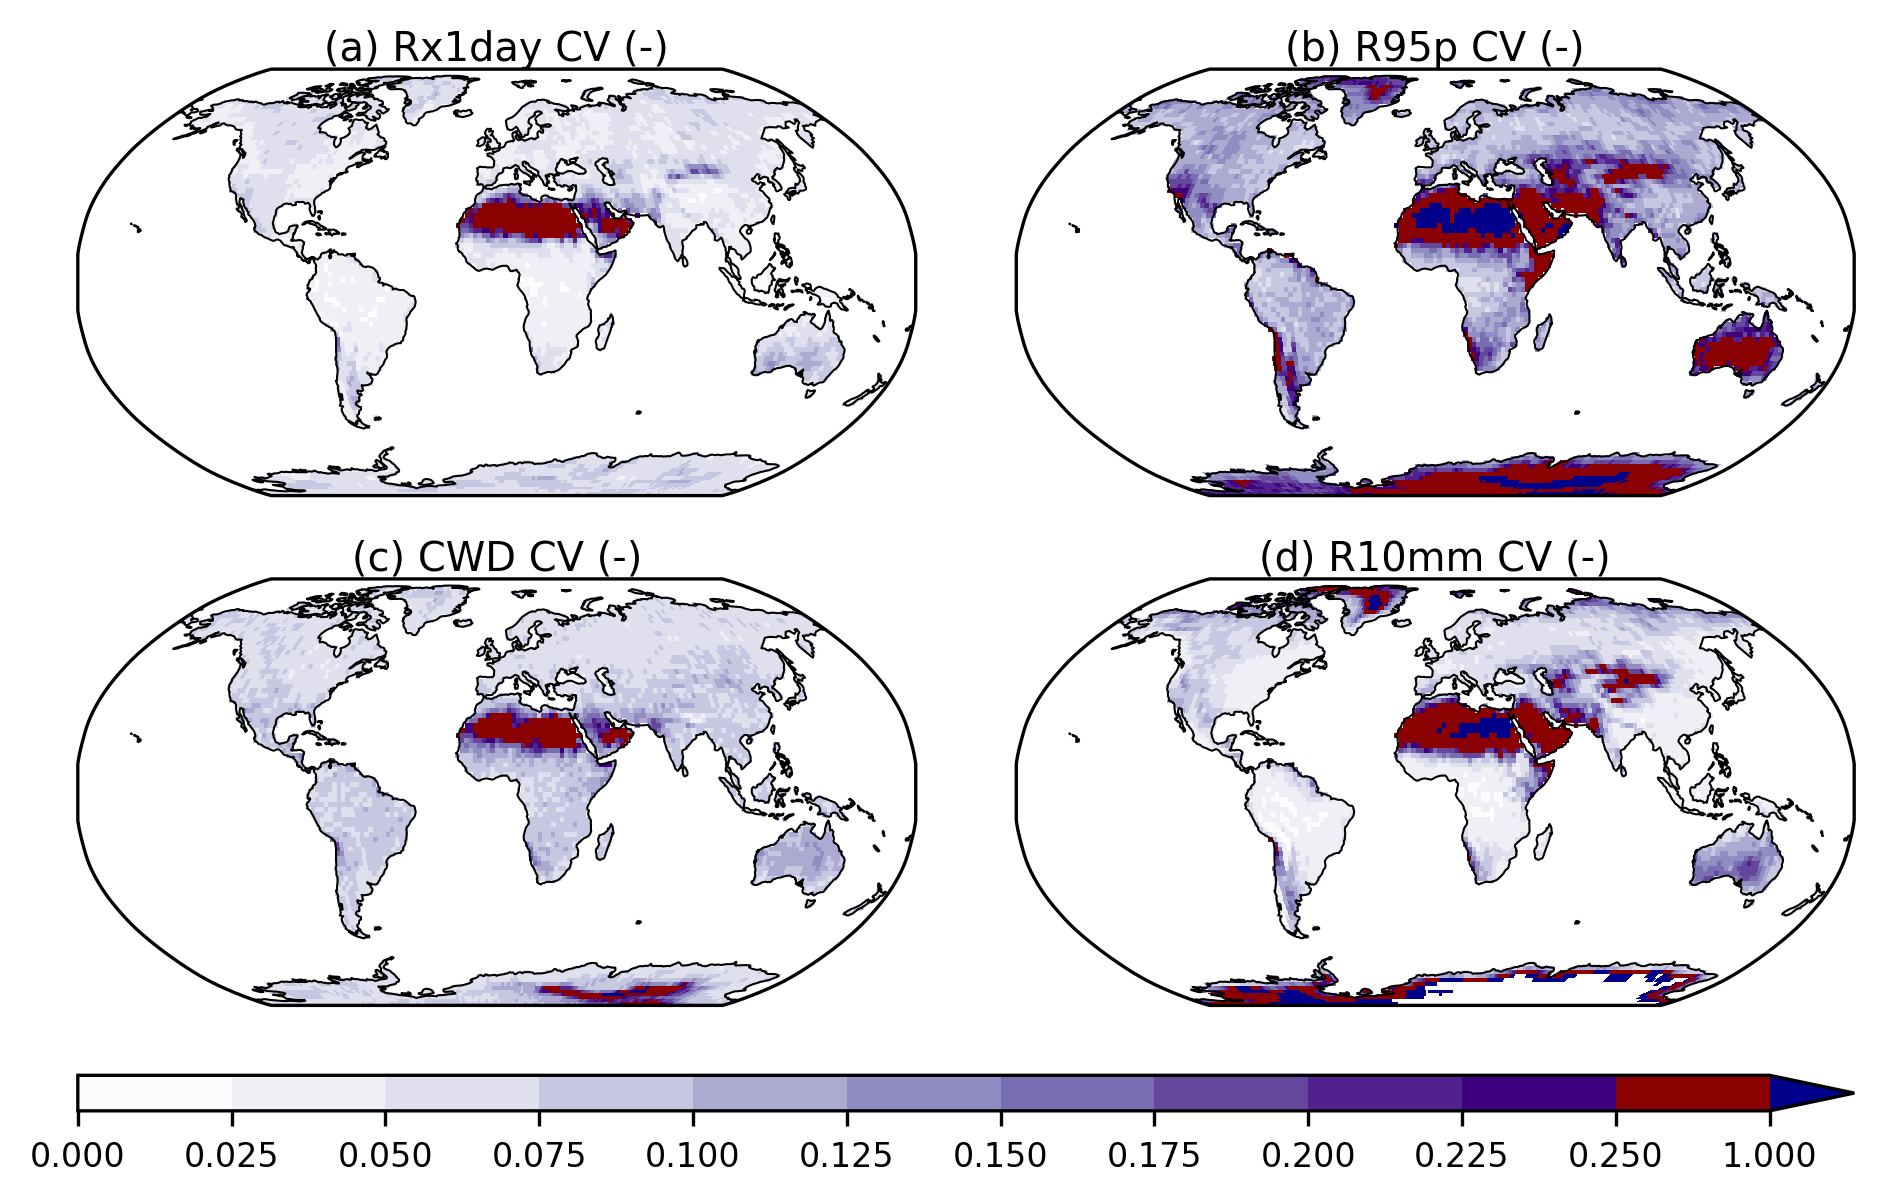

In [11]:
levels_cv = np.arange(0, .251, .025)
levels_cv = np.concatenate([levels_cv, [1]])
cmap_cv = mpl.colormaps['Purples']
colors = cmap_cv(np.linspace(0, 1, len(levels_cv)-2))
colors = np.concatenate([colors, [to_rgba('darkred')]])
cmap_cv = mpl.colors.ListedColormap(colors)
cmap_cv.set_over(to_rgba('darkblue'))

kwargs_figure5 = dict(
    transform = ccrs.PlateCarree(),
    levels = levels_cv,
    cmap = cmap_cv,
    add_colorbar=False,
)

fig, axes = plt.subplot_mosaic(
    """
    ab
    cd
    hh
    """,
    figsize=(16*cm, 10*cm),
    dpi=dpi,
    per_subplot_kw={
        ('a', 'b', 'c', 'd'): {'projection': ccrs.Robinson()},
    },
    height_ratios=[1, 1, .2],
    gridspec_kw={'wspace': .12, 'hspace': .17, 'left': .03, 'right': .97, 'bottom': .02, 'top': .96},
    
)

for subplot in ['a', 'b', 'c', 'd']:
    axes[subplot].coastlines(lw=.5)

subplot = 'a'
index = 'rx1day'
(indices[index].std('member') / indices[index].mean('member')).plot.pcolormesh(ax=axes[subplot], **kwargs_figure5)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} CV (-)', pad=.1)

subplot = 'b'
index = 'r95p'
(indices[index].std('member') / indices[index].mean('member')).plot.pcolormesh(ax=axes[subplot], **kwargs_figure5)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} CV (-)', pad=.1)

subplot = 'c'
index = 'cwd'
(indices[index].std('member') / indices[index].mean('member')).plot.pcolormesh(ax=axes[subplot], **kwargs_figure5)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} CV (-)', pad=.1)

subplot = 'd'
index = 'r10mm'
map_ = (indices[index].std('member') / indices[index].mean('member')).plot.pcolormesh(ax=axes[subplot], **kwargs_figure5)
axes[subplot].set_title(f'({subplot}) {indices[index].attrs["long_name"]} CV (-)', pad=.1)

ax = axes['h']
ax.axis("off")
cbar = plt.colorbar(
    map_, ax=ax, shrink=1, fraction=1, aspect=50,
    ticks=levels_cv, 
    label='', orientation='horizontal')


plt.savefig(os.path.join(fig_path, 'precipitation_cv.png'), dpi=dpi)
plt.savefig(os.path.join(fig_path, 'precipitation_cv.pdf'), dpi=dpi)